In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [5]:


# Load the dataset
data = pd.read_csv('usp_drug_classification.csv')
data.head()

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,Analgesics,Nonsteroidal Anti-inflammatory Drugs,Celecoxib,NaN,Celecoxib,D00567,(JAN/USAN/INN)
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,Diclofenac,DG00441,Diclofenac,D07816,(USAN/INN)
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,Diclofenac,DG00441,Diclofenac potassium,D00903,(USAN)
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,Diclofenac,DG00441,Diclofenac sodium,D00904,(JP17/USP)
4,Analgesics,Nonsteroidal Anti-inflammatory Drugs,Diclofenac,DG00441,Diclofenac diethylamine,D07817,NaN


In [6]:
data.shape

(1803, 7)

In [7]:


# Data Preprocessing
# Handling Missing Values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
usp_category              0
usp_class                 0
usp_drug                  0
kegg_id_drug            460
drug_example              0
kegg_id_drug_example      0
nomenclature            130
dtype: int64


In [9]:
data=data.dropna()

In [10]:
data.isnull().sum()

usp_category            0
usp_class               0
usp_drug                0
kegg_id_drug            0
drug_example            0
kegg_id_drug_example    0
nomenclature            0
dtype: int64

In [10]:
data.shape

(1238, 7)

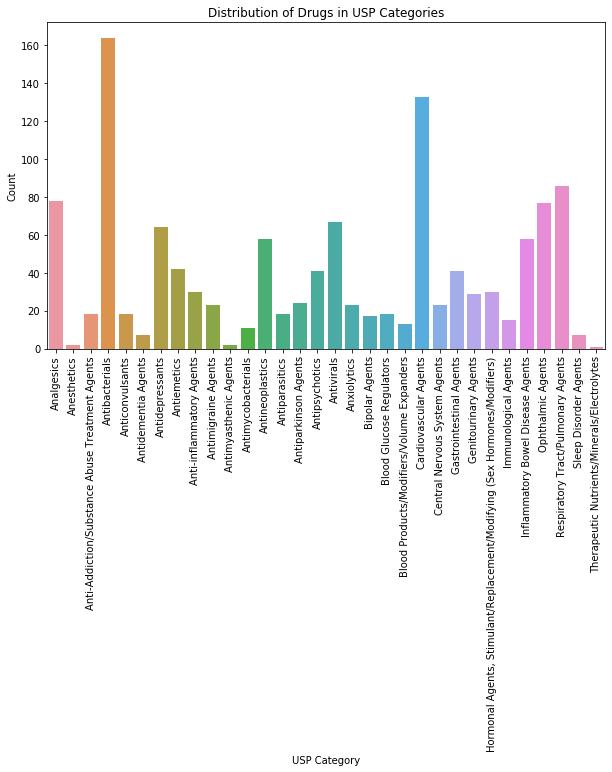

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x="usp_category", data=data)
plt.xticks(rotation=90)
plt.title("Distribution of Drugs in USP Categories")
plt.xlabel("USP Category")
plt.ylabel("Count")
plt.show()

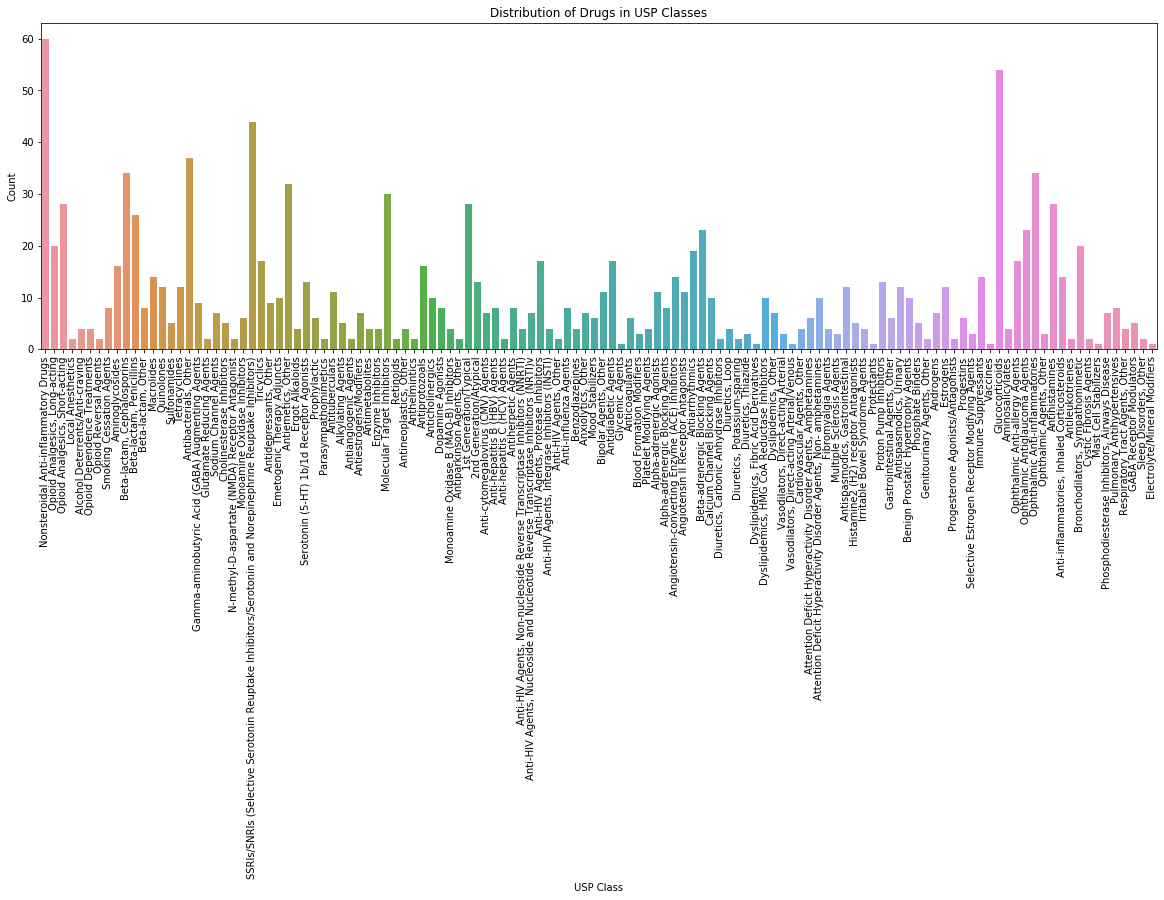

In [12]:
plt.figure(figsize=(20, 6))
sns.countplot(x="usp_class", data=data)
plt.xticks(rotation=90)
plt.title("Distribution of Drugs in USP Classes")
plt.xlabel("USP Class")
plt.ylabel("Count")
plt.show()


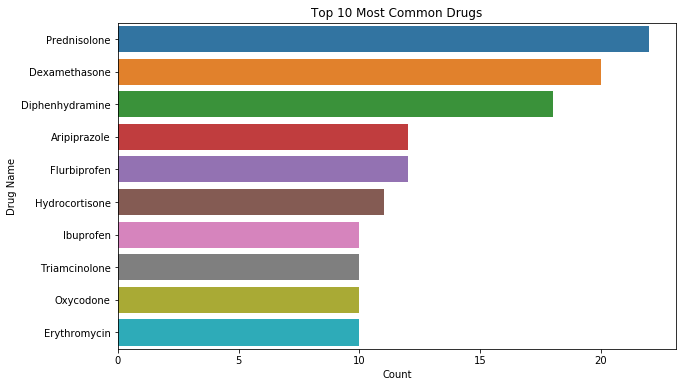

In [13]:
plt.figure(figsize=(10, 6))
top_10_drugs = data['usp_drug'].value_counts()[:10]
sns.barplot(x=top_10_drugs.values, y=top_10_drugs.index)
plt.title("Top 10 Most Common Drugs")
plt.xlabel("Count")
plt.ylabel("Drug Name")
plt.show()


In [13]:
# Label Encoding for string columns
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

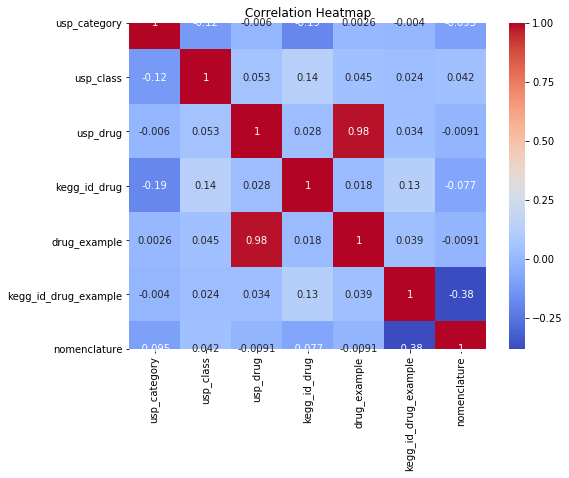

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
# Target Variable
X = data.drop(['usp_category'], axis=1)
y = data['usp_category']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Engineering
# Feature Transformation: Scaling numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model: K-Nearest Neighbors
Accuracy: 0.33
Precision: 0.28
Recall: 0.33
F1-Score: 0.29


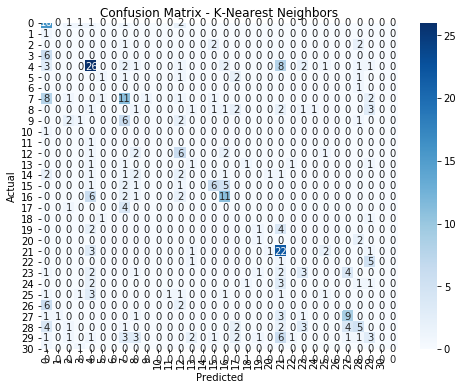

Model: Logistic Regression
Accuracy: 0.27
Precision: 0.20
Recall: 0.27
F1-Score: 0.22


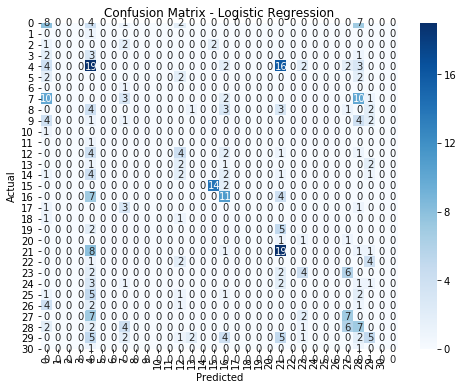

Model: Support Vector Machine
Accuracy: 0.50
Precision: 0.48
Recall: 0.50
F1-Score: 0.46


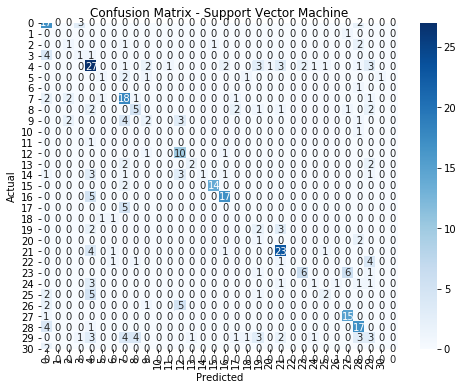

Model: Decision Tree
Accuracy: 0.83
Precision: 0.84
Recall: 0.83
F1-Score: 0.83


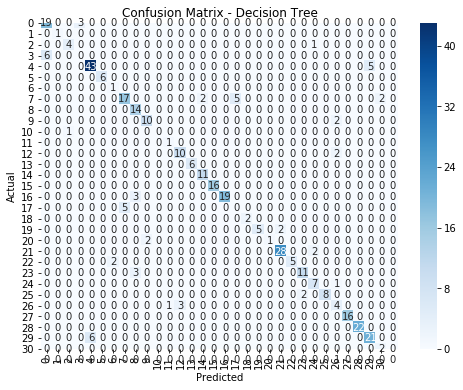

In [16]:
# Model Selection
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

best_models = {}

for model_name, model in models.items():
    # Hyperparameter Tuning using Grid Search
    if model_name == "K-Nearest Neighbors":
        param_grid = {"n_neighbors": [3, 5, 7, 9]}
    elif model_name == "Logistic Regression":
        param_grid = {"C": [0.1, 1, 10], "max_iter": [100, 500]}
    elif model_name == "Support Vector Machine":
        param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    elif model_name == "Decision Tree":
        param_grid = {"max_depth": [None, 5, 10, 15]}

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

# Model Evaluation
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)

    print(f"Model: {model_name}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    precision = classification_rep["weighted avg"]["precision"]
    recall = classification_rep["weighted avg"]["recall"]
    f1 = classification_rep["weighted avg"]["f1-score"]
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()